In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'


MyDrive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/mri/Training'
test_path = '/content/drive/MyDrive/mri/Testing'

Working with 826 images
Image examples: 
gg (561).jpg


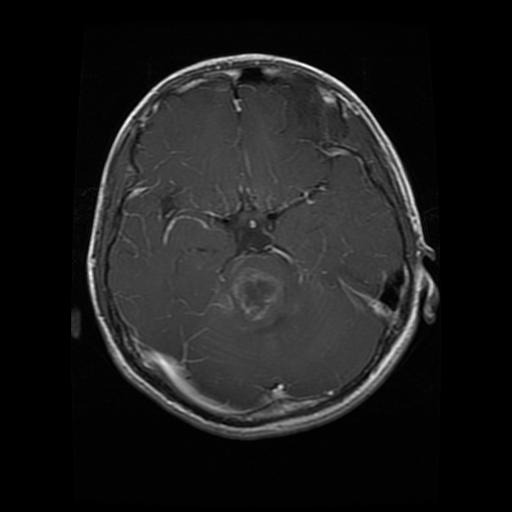

gg (54).jpg


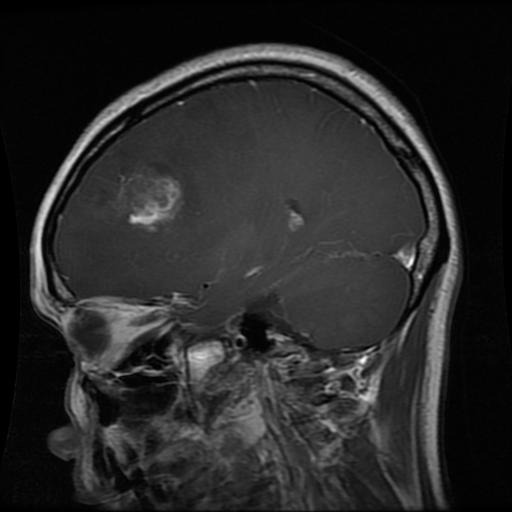

gg (224).jpg


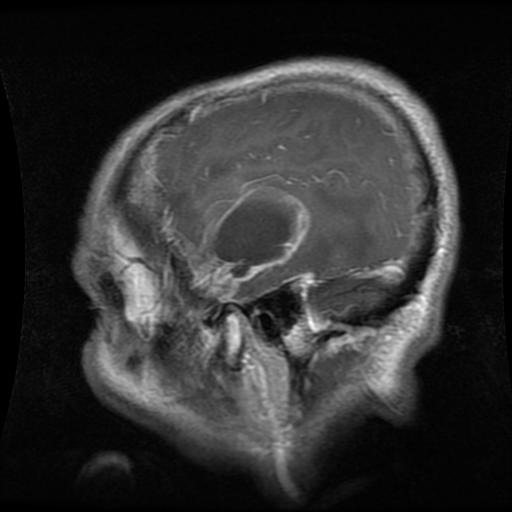

gg (115).jpg


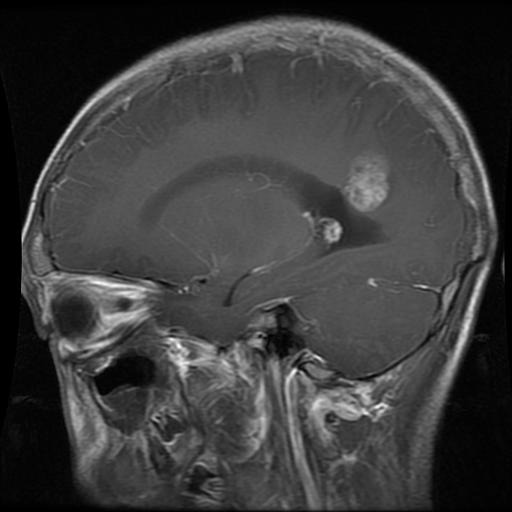

gg (734).jpg


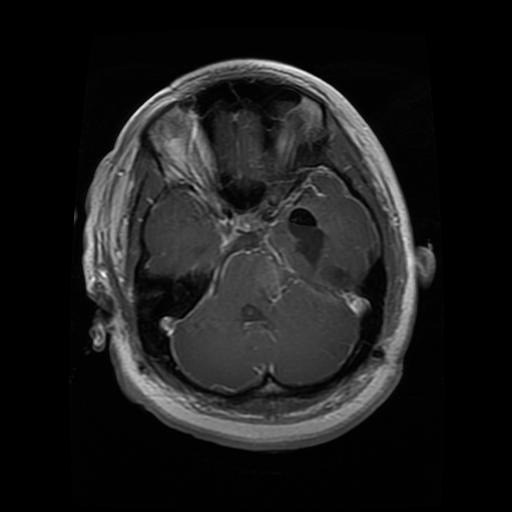

gg (508).jpg


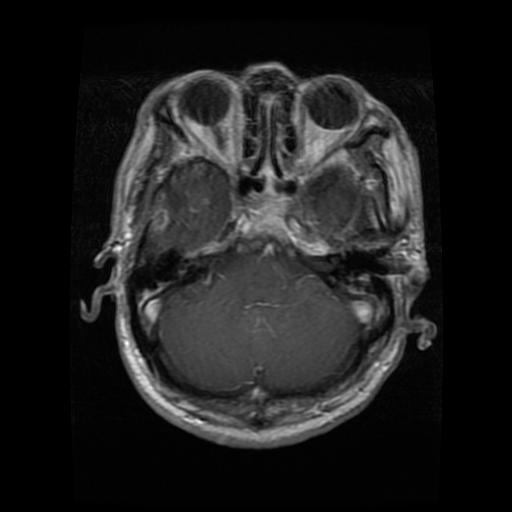

gg (495).jpg


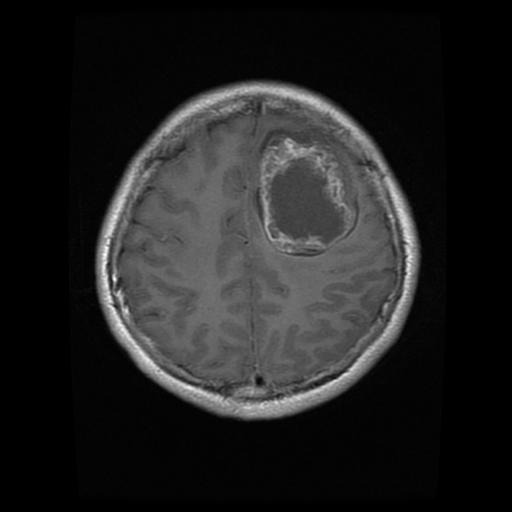

gg (230).jpg


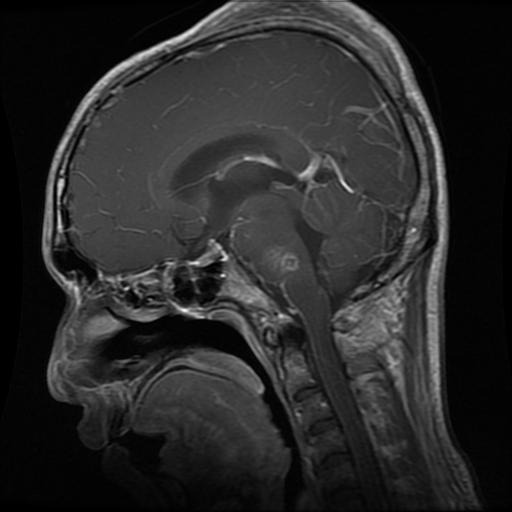

gg (745).jpg


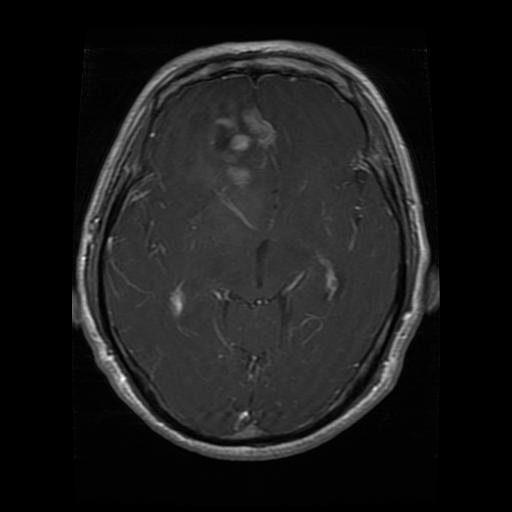

gg (22).jpg


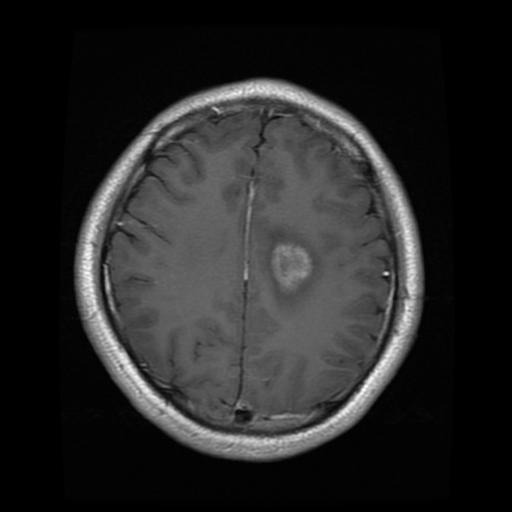

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/glioma_tumor'


gliomatumorfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(gliomatumorfiles)))
print("Image examples: ")


for i in range(10):
    print(gliomatumorfiles[i])
    display(_Imgdis(filename=folder + "/" + gliomatumorfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/mri/Training/*')
print(len(folders))

4


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2870 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 394 images belonging to 4 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel1.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=10,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10



Epoch 1: val_loss improved from inf to 3.85548, saving model to mymodel1.h5
10/10 - 285s - loss: 2.9519 - accuracy: 0.5531 - val_loss: 3.8555 - val_accuracy: 0.4391 - 285s/epoch - 29s/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10


10/10 - 77s - loss: 1.8513 - accuracy: 0.6781 - 77s/epoch - 8s/step
Epoch 3/10


10/10 - 70s - loss: 1.6049 - accuracy: 0.7281 - 70s/epoch - 7s/step
Epoch 4/10


10/10 - 57s - loss: 1.9658 - accuracy: 0.6871 - 57s/epoch - 6s/step
Epoch 5/10


10/10 - 57s - loss: 1.7879 - accuracy: 0.7188 - 57s/epoch - 6s/step
Epoch 6/10


10/10 - 51s - loss: 1.4567 - accuracy: 0.7594 - 51s/epoch - 5s/step
Epoch 7/10


10/10 - 48s - loss: 1.2877 - accuracy: 0.7812 - 48s/epoch - 5s/step
Epoch 8/10


10/10 - 38s - loss: 1.4225 - accuracy: 0.7594 - 38s/epoch - 4s/step
Epoch 9/10


10/10 - 33s - loss: 1.4680 - accuracy: 0.7594 - 33s/epoch - 3s/step
Epoch 10/10


10/10 - 25s - loss: 1.2403 - accuracy: 0.7969 - 25s/epoch - 3s/step
Training completed in time:  0:14:12.919003


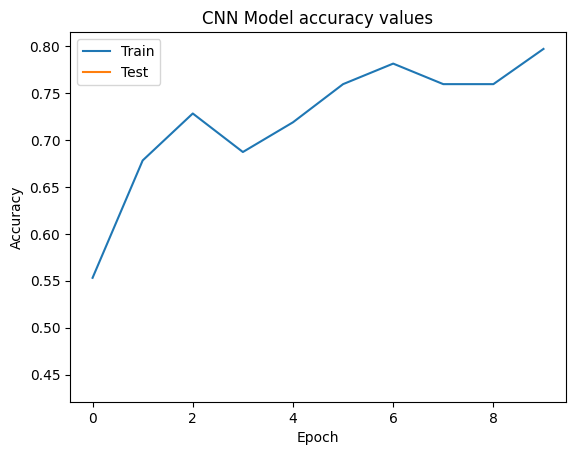

In [19]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
